In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
data = pd.DataFrame({"toothed":["True","True","True","False","True","True","True","True","True","False"],
                     "hair":["True","True","False","True","True","True","False","False","True","False"],
                     "breathes":["True","True","True","True","True","True","False","True","True","True"],
                     "legs":["True","True","False","True","True","True","False","False","True","True"],
                     "species":["Mammal","Mammal","Reptile","Mammal","Mammal","Mammal","Reptile","Reptile","Mammal","Reptile"]}, 
                    
                    
                    columns=["toothed","hair","breathes","legs","species"])

features = data[["toothed","hair","breathes","legs"]]

In [29]:
data.shape

(10, 5)

In [3]:
target = data["species"]

In [4]:
data.head()

,toothed,hair,breathes,legs,species
0,True,True,True,True,Mammal
1,True,True,True,True,Mammal
2,True,False,True,False,Reptile
3,False,True,True,True,Mammal
4,True,True,True,True,Mammal


In [12]:
X = data.loc[:, data.columns != "species"]
y = data.loc[:, data.columns == "species"]

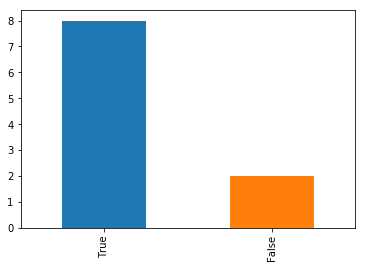

In [7]:
data.toothed.value_counts().plot.bar()

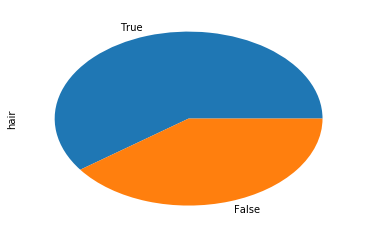

In [8]:
data.hair.value_counts().plot.pie()

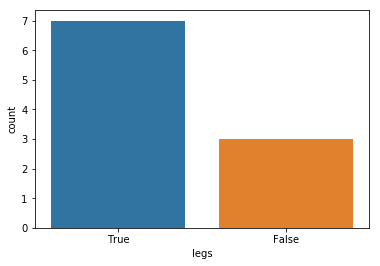

In [9]:
sns.countplot(data.legs)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtf = DecisionTreeClassifier()

In [17]:
new_df = pd.get_dummies(data.loc[:, data.columns != "species"])

In [18]:
new_df.columns

Index(['toothed_False', 'toothed_True', 'hair_False', 'hair_True',
       'breathes_False', 'breathes_True', 'legs_False', 'legs_True'],
      dtype='object')

In [19]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()

In [23]:
y = le.fit_transform(data.loc[:, data.columns == "species"])

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
dtf.fit(new_df, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
y_pred = dtf.predict(new_df)

In [28]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y, y_pred)

1.0

In [33]:
data.groupby(["species", "hair"]).count()

,,toothed,breathes,legs
species,hair,,,
Mammal,True,6,6,6
Reptile,False,4,4,4
